### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Determine the number of unique values in each column in the original dataframe.
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
# Drop the non-beneficial ID columns'EIN' column, but KEEP NAME
application_df = application_df.drop(columns = ["EIN", "SPECIAL_CONSIDERATIONS", "STATUS","INCOME_AMT"])
print(application_df.shape)
application_df.head(10)

(34299, 8)


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,142590,1
5,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,5000,1
6,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,31452,1
7,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,7508025,1
8,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,94389,1
9,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,5000,0


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                19568
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [5]:
# # Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

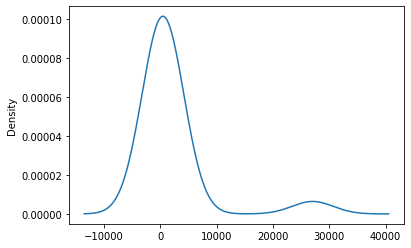

In [6]:
#Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
# # use 500
replace_application = list(app_type_count[app_type_count <500].index)

# # Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# # Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# # Look at CLASSIFICATION value counts for binning
unique_class = application_df.CLASSIFICATION.nunique()
class_count = application_df.CLASSIFICATION.value_counts()
print(unique_class)
print(class_count)

71
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1580        1
C1248        1
C1732        1
C2570        1
C2500        1
Name: CLASSIFICATION, Length: 71, dtype: int64


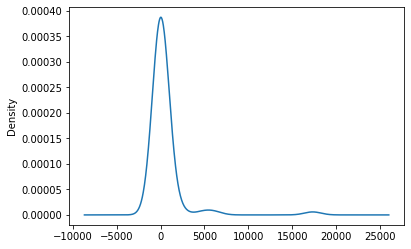

In [9]:
# # Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [10]:
# # Determine which values to replace if counts are less than ..?
# # use 1000 for fewer bins
replace_class = list(class_count[class_count < 500].index)

# # Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# # Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64


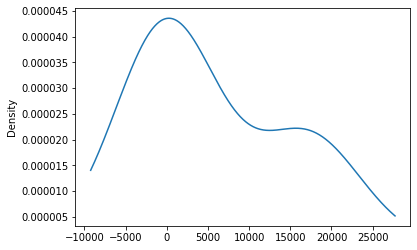

In [11]:
# check affiliation
affiliation_count = application_df.AFFILIATION.value_counts()
print(affiliation_count)
# Visualize the value counts of AFFILIATION
affiliation_count.plot.density()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64


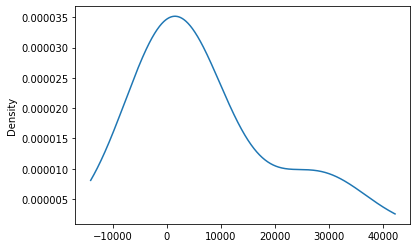

In [12]:
use_case_count = application_df.USE_CASE.value_counts()
print(use_case_count)
# Visualize the value counts of USE_CASE
use_case_count.plot.density()

In [13]:
# # check INCOME_AMT
# income_amt_count = application_df.INCOME_AMT.value_counts()
# print(income_amt_count)
# income_amt_count.plot.density()

In [14]:
# # check INCOME_AMT
# special_cons_count = application_df.SPECIAL_CONSIDERATIONS.value_counts()
# print(special_cons_count)
# special_cons_count.plot.density()

In [15]:
# check column NAME - the one we take back after trying to optimize the model without it and not able to achieve accuracy over 75%
org_names = application_df.NAME.value_counts()
org_names

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
RITE TO PASSAGE INC                                   1
WILD HORIZONS WILDLIFE ORPHANAGE AND SANCTUARY        1
CHIPS NETWORK INC                                     1
INDIA DISCIPLESHIP NETWORK                            1
FAR AWAY FRIENDS INC                                  1
Name: NAME, Length: 19568, dtype: int64

In [16]:
# Determine which values to replace if counts are less than 500 (we have 19568 total count)
replace_org_names = list(org_names[org_names < 100].index)

# Replace in dataframe
for name in replace_org_names:
    application_df.NAME = application_df.NAME.replace(name,"OtherNames")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

OtherNames                                                            25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [17]:
# Generate our categorical variable lists
# name categorical_cat - used in the next cell
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
print(application_cat)

['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION']


In [18]:
# check a number of unique values in ea column
application_df[application_cat].nunique()

NAME                31
APPLICATION_TYPE     9
AFFILIATION          6
CLASSIFICATION       7
USE_CASE             5
ORGANIZATION         4
dtype: int64

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
application_df.dtypes

ASK_AMT                                                   int64
IS_SUCCESSFUL                                             int64
NAME_ALPHA PHI SIGMA                                    float64
NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC    float64
NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN           float64
                                                         ...   
USE_CASE_ProductDev                                     float64
ORGANIZATION_Association                                float64
ORGANIZATION_Co-operative                               float64
ORGANIZATION_Corporation                                float64
ORGANIZATION_Trust                                      float64
Length: 64, dtype: object

In [22]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns = "IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               6400      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 12,491
Trainable params: 12,491
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 957us/step - loss: 0.5158 - accuracy: 0.7394
Epoch 2/100
155/804 [====>.........................] - ETA: 0s - loss: 0.5011 - accuracy: 0.7482
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 980us/step - loss: 0.5017 - accuracy: 0.7479
Epoch 3/100
372/804 [============>.................] - ETA: 0s - loss: 0.4939 - accuracy: 0.7513
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 975us/step - loss: 0.4994 - accuracy: 0.7502
Epoch 4/100
534/804 [==================>...........] - ETA: 0s - loss: 0.4989 - accuracy: 0.7501
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 958us/step - loss: 0.4985 - accuracy: 0.7503
Epoch 5/100
736/804 [==========================>...] - ETA: 0s - loss: 0.4965 - accuracy: 0.7507
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 

Epoch 39/100
439/804 [===============>..............] - ETA: 0s - loss: 0.4854 - accuracy: 0.7610
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 1s 950us/step - loss: 0.4872 - accuracy: 0.7585
Epoch 40/100
600/804 [=====================>........] - ETA: 0s - loss: 0.4873 - accuracy: 0.7556
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 957us/step - loss: 0.4872 - accuracy: 0.7564
Epoch 41/100
804/804 [==============================] - 1s 973us/step - loss: 0.4870 - accuracy: 0.7575
Epoch 42/100
  1/804 [..............................] - ETA: 0s - loss: 0.6628 - accuracy: 0.6562
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 1s 937us/step - loss: 0.4867 - accuracy: 0.7577
Epoch 43/100
229/804 [=======>......................] - ETA: 0s - loss: 0.4847 - accuracy: 0.7602
Epoch 00043: saving model to checkpoints\weights.43.hdf5
804

645/804 [=======================>......] - ETA: 0s - loss: 0.4829 - accuracy: 0.7600
Epoch 00076: saving model to checkpoints\weights.76.hdf5
804/804 [==============================] - 1s 954us/step - loss: 0.4842 - accuracy: 0.7590
Epoch 77/100
804/804 [==============================] - 1s 946us/step - loss: 0.4843 - accuracy: 0.7586
Epoch 78/100
 54/804 [=>............................] - ETA: 0s - loss: 0.4837 - accuracy: 0.7529
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 1s 969us/step - loss: 0.4844 - accuracy: 0.7593
Epoch 79/100
281/804 [=========>....................] - ETA: 0s - loss: 0.4785 - accuracy: 0.7633
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 961us/step - loss: 0.4842 - accuracy: 0.7592
Epoch 80/100
441/804 [===============>..............] - ETA: 0s - loss: 0.4859 - accuracy: 0.7572
Epoch 00080: saving model to checkpoints\weights.80.hdf5
804/804 [=======

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4974 - accuracy: 0.7587
Loss: 0.49743354320526123, Accuracy: 0.7587171792984009


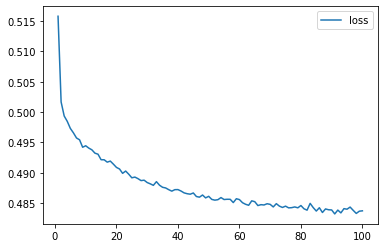

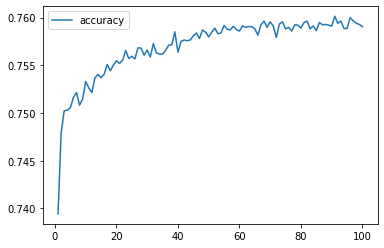

In [29]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
# score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input.
history_df.plot(y="loss")
# Plot the accuracy
# the higher the better
history_df.plot(y="accuracy")

In [30]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_16.h5")